# Prediction of Credit Card Payment Defaults


---


We will use the "Default of Credit Card Clients" dataset available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) and build an ML classification model that accurately predicts the customers who default to using their credit cards

This dataset contains information about payment defaults and credit card bills for 30,000 clients in Taiwan from April 2005 to September 2005.


## Variable Definitions


---
### Response Variable
- **Default Payment**: Binary variable indicating whether the client defaulted on payment (Yes = 1, No = 0).

### Explanatory Variables
1. **Amount of Given Credit**: Total credit (NT dollars), including individual and supplementary credit.
2. **Gender**: 1 = Male; 2 = Female.
3. **Education Level**: 1 = Graduate School; 2 = University; 3 = High School; 4 = Other.
4. **Marital Status**: 1 = Married; 2 = Single; 3 = Other.
5. **Age**: Client’s age (in years).

#### Payment History
- **Repayment Status (April to September 2005)**:  

  - Scale:  
    - -1 = Paid on time  
    - 1 = 1 month delay,
    - 2 = 2 months delay, ..., 8 = 8 months delay,
    - 9 = 9+ months delay.

#### Bill Statement Amount (NT dollars)
- Monthly Bill Statements (April to September 2005)  

#### Previous Payment Amount (NT dollars)
- Monthly Payment Amounts (April to September 2005)






# Data Cleaning & Analysis (Week 1)


---


The dataset is in an XLS file, and I will use the direct link to it for easier access when opening the notebook.

In [109]:
# Import libraries to explore datase
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL variable for the dataset to use in pd.read
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

# Load the dataset and skip the first row header since we don't need that.
df = pd.read_excel(url, skiprows=[0])

dfref = pd.read_excel(url, skiprows=[0])

We removed the first column and the first row as they do not add value to the analysis.


In [110]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Transforming: simple changes to facilitate my visualization and understanding.


In [111]:
# Normalization of column names

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [112]:
# Moving response variable as the first column in the dataset

df = df[[df.columns[-1]] + list(df.columns[:-1])]
df.head()

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [113]:
# Renaming past payments columns based on month
df.rename(columns={'pay_0': 'sept_repayment',
                   'pay_2': 'aug_repayment',
                   'pay_3': 'july_repayment',
                   'pay_4': 'june_repayment',
                   'pay_5': 'may_repayment',
                   'pay_6': 'april_repayment'},
           inplace=True)

df.head()

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [114]:
# Renaming monthly bill columns based on month
df.rename(columns={'bill_amt1': 'sept_bill',
                   'bill_amt2': 'aug_billt',
                   'bill_amt3': 'july_bill',
                   'bill_amt4': 'june_bill',
                   'bill_amt5': 'may_bill',
                   'bill_amt6': 'april_bill'},
          inplace=True)

df.head()

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,...,july_bill,june_bill,may_bill,april_bill,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,1,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [115]:
# Renaming amount of previous payment columns based on month
df.rename(columns={'pay_amt1': 'sept_prevPaid',
                   'pay_amt2': 'aug_prevPaid',
                   'pay_amt3':'july_prevPaid',
                   'pay_amt4': 'june_prevPaid',
                   'pay_amt5': 'may_prevPaid',
                   'pay_amt6': 'april_prevPaid'},
           inplace=True)
df.head()

,default_payment_next_month,id,limit_bal,sex,education,marriage,age,sept_repayment,aug_repayment,july_repayment,...,july_bill,june_bill,may_bill,april_bill,sept_prevPaid,aug_prevPaid,july_prevPaid,june_prevPaid,may_prevPaid,april_prevPaid
0,1,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default_payment_next_month  30000 non-null  int64
 1   id                          30000 non-null  int64
 2   limit_bal                   30000 non-null  int64
 3   sex                         30000 non-null  int64
 4   education                   30000 non-null  int64
 5   marriage                    30000 non-null  int64
 6   age                         30000 non-null  int64
 7   sept_repayment              30000 non-null  int64
 8   aug_repayment               30000 non-null  int64
 9   july_repayment              30000 non-null  int64
 10  june_repayment              30000 non-null  int64
 11  may_repayment               30000 non-null  int64
 12  april_repayment             30000 non-null  int64
 13  sept_bill                   30000 non-null  int64
 14  aug_bi

We confirm dataset has 30,000 rows, now has 24 columns, and only contains numeric (int) values.

Our variable of interest is DEFAULT, which we need to predict.


### Missing Values

In [117]:
df.isnull().sum()

,0
default_payment_next_month,0
id,0
limit_bal,0
sex,0
education,0
marriage,0
age,0
sept_repayment,0
aug_repayment,0
july_repayment,0


# EDA: Exploring and understanding our data (Week 1)


---



In [118]:
# Unique categories in "Education"
print("Unique categories in 'Education':", df['education'].unique())

# Unique categories in "Marital Status"
print("Unique categories in 'Marital Status':", df['marriage'].unique())

# Unique categories in "Gender"
print("Unique categories in 'Gender':", df['sex'].unique())

# Unique categories in "September Repayment"
print("Unique categories in 'September Repayment':", df['sept_repayment'].unique())

Unique categories in 'Education': [2 1 3 5 4 6 0]
Unique categories in 'Marital Status': [1 2 3 0]
Unique categories in 'Gender': [2 1]
Unique categories in 'September Repayment': [ 2 -1  0 -2  1  3  4  8  7  5  6]


In [119]:
education_counts = df['education'].value_counts()
print("Education Counts:\n", education_counts)

Education Counts:
 education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


Education level in this datase includes:


*   1 = graduate school
*   2 = university
*   3 = high school
*   4 = others

In [120]:
#Since categories 0, 5, and 6 do not exist, I will add them under 4 = others

df['education'] = df['education'].replace({0: 4, 5: 4, 6: 4})

I will also add easier-to-understand labels for the categories sex, education, and marriage.

In [121]:
custom_labels = {
    'sex': {1: 'Male', 2: 'Female'},
    'education': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'},
    'marriage': {1: 'Married', 2: 'Single', 3: 'Others'}
}

In [122]:
total_count = education_counts.sum()

# Calculate the percentage for each category
education_percentage = (education_counts / total_count) * 100
print(education_percentage)

education
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: count, dtype: float64


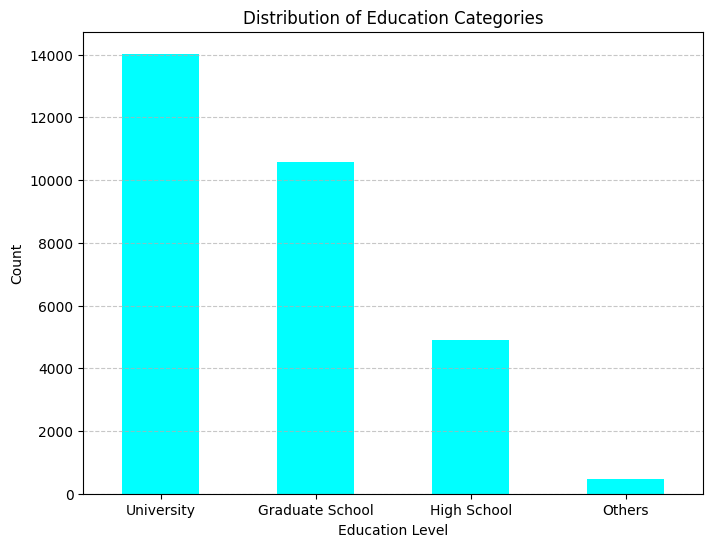

In [123]:
# Map the values of the 'education' column using custom_labels
education_counts = df['education'].map(custom_labels['education']).value_counts()

# Bar plot for Education Categories
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='cyan')
plt.title('Distribution of Education Categories')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [124]:
# Unique categories in "DEFAULT"
print("Unique categories in 'Default':", df['default_payment_next_month'].unique())

Unique categories in 'Default': [1 0]


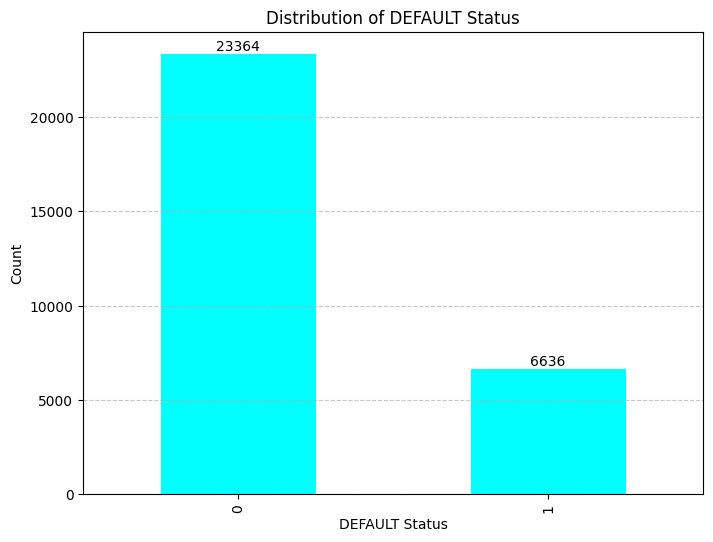

In [125]:
plt.figure(figsize=(8, 6))

ax = df['default_payment_next_month'].value_counts().plot(kind='bar', color='cyan')
plt.title("Distribution of DEFAULT Status")
plt.xlabel("DEFAULT Status")
plt.ylabel("Count")

# Add labels to the bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # X position
        p.get_height(),                # Y position
        int(p.get_height()),           # Text (height of the bar)
        ha='center',                   # Horizontal alignment
        va='bottom'                    # Vertical alignment
    )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We observe that our data is unbalanced. There are significantly more customers who have paid their bills than customers in default

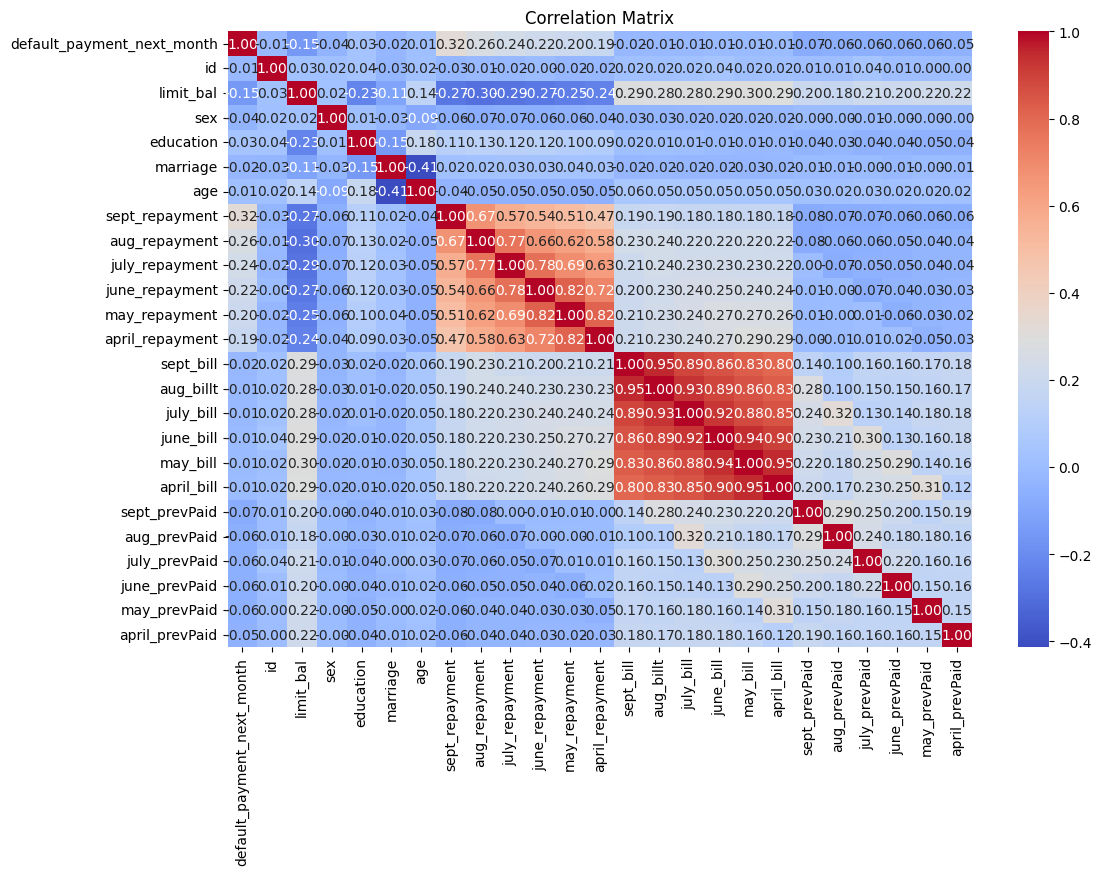

In [134]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

### Summary for Predicting `default_payment_next_month`:

**Critical Variables:**  
Payment delays (`PAY_0` to `PAY_6`) are the most important features. Among them, `PAY_0` stands out as the most predictive.

**Less Relevant Variables:**  

Factors like gender (`SEX`), education level (`education`), marital status (`MARRIAGE`), and age (`AGE`) have minimal influence and could be discarded or used as secondary features.


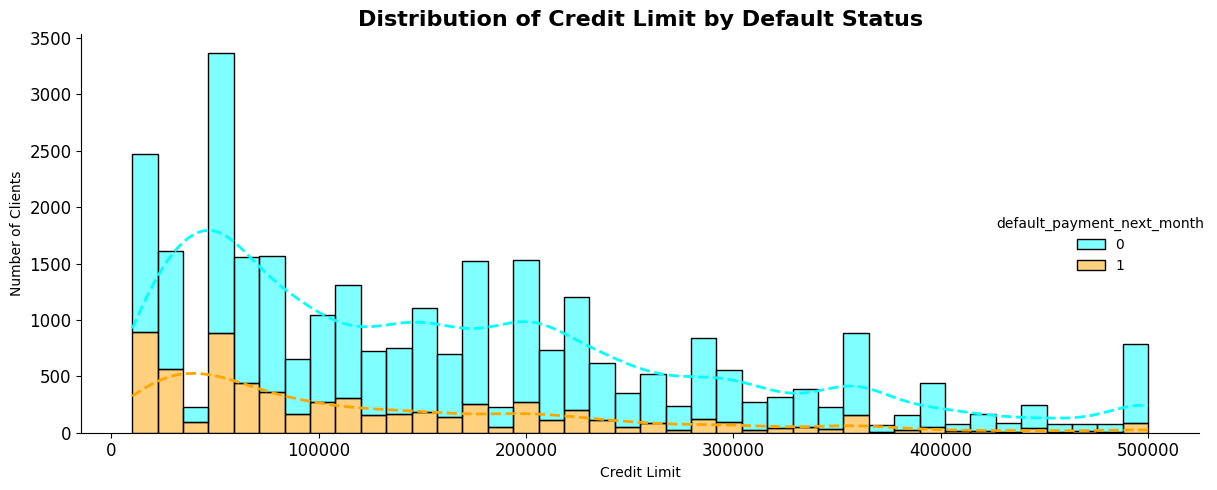

In [167]:
# Plot the distribution of LIMIT_BAL with KDE and DEFAULT hue
sns.displot(
    data=df[df['limit_bal'] <= 500000],
    x="limit_bal",
    hue="default_payment_next_month",
    multiple="stack",
    stat='count',
    palette= ['cyan', 'orange'],
    kde=True,
    line_kws={'ls': '--', 'lw': 2, 'color': 'black'},
    height=5,
    aspect=2
).set_axis_labels(
    "Credit Limit",
    "Number of Clients"
    )

# Set tick format to avoid scientific notation
plt.ticklabel_format(style="plain")

# Add title with custom font size and weight
plt.title("Distribution of Credit Limit by Default Status", fontsize=16, fontweight="bold")

# Adjust tick parameters
plt.xticks(fontsize=12)  # Rotate X-axis labels
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Avoid overlapping of elements

plt.show()

In [148]:
df.groupby('default_payment_next_month')['limit_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
default_payment_next_month,,,,,,,,
0,23364.0,178099.726074,131628.359660,10000.0,70000.0,150000.0,250000.0,1000000.0
1,6636.0,130109.656420,115378.540571,10000.0,50000.0,90000.0,200000.0,740000.0


In [151]:
df['limit_bal'].value_counts()

,count
limit_bal,
50000,3365
20000,1976
30000,1610
80000,1567
200000,1528
...,...
730000,2
1000000,1
327680,1


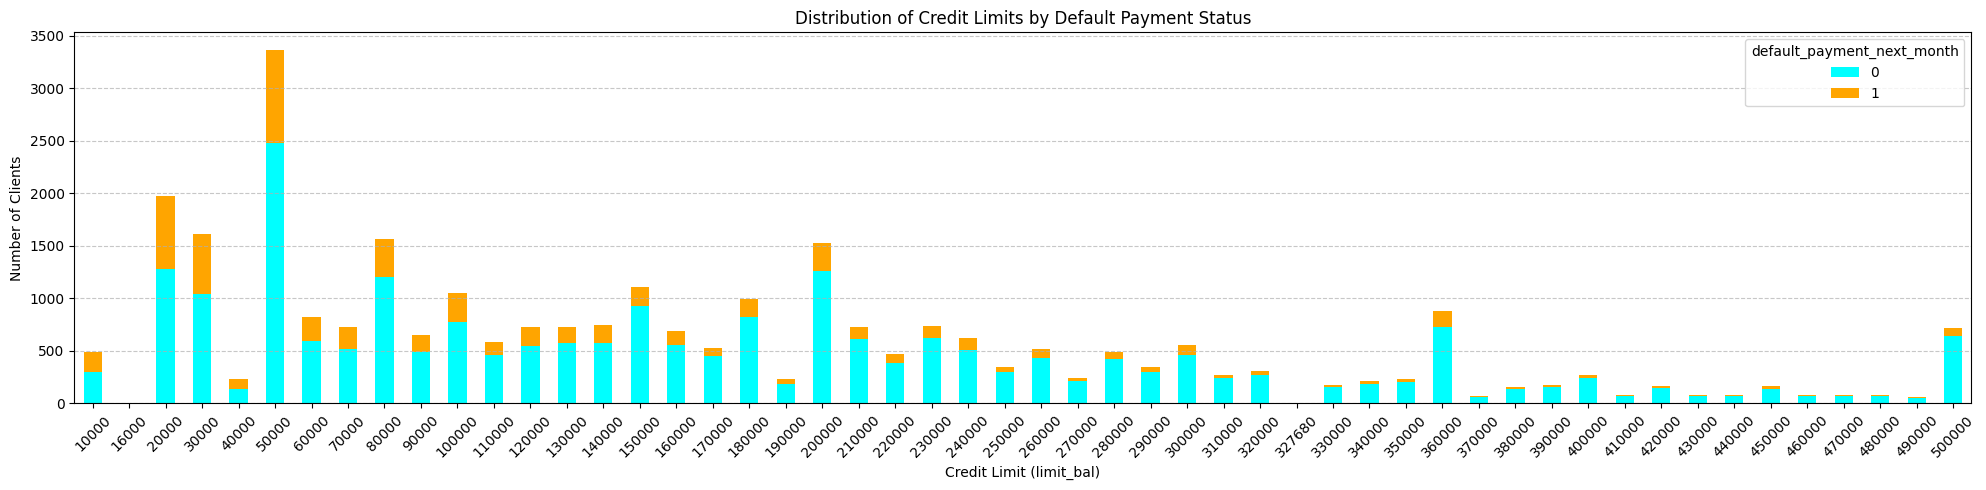

In [165]:
# Filter the DataFrame to include only rows where limit_bal <= 500,000
filtered_df = df[df['limit_bal'] <= 500000]

# Group the filtered data by 'limit_bal' and count occurrences of each 'default_payment_next_month' value
grouped_data = filtered_df.groupby('limit_bal')['default_payment_next_month'].value_counts()

# Sort the index to ensure proper order of credit limits
sorted_data = grouped_data.sort_index()

# Unstack the data to create columns for each category of 'default_payment_next_month'
unstacked_data = sorted_data.unstack()

# Plot the data as a stacked bar chart
unstacked_data.plot(
    kind='bar',
    #color='cyan',
    stacked=True,
    figsize=(20, 5),
    title='Distribution of Credit Limits by Default Payment Status',
    color = ['cyan', 'orange'],
)

plt.xlabel("Credit Limit (limit_bal)")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Feature Engineering & Model Selection (Week 2 & 3)


---


**Prediction of Default Payment**

To predict `default_payment_next_month` we will split the dataset into training and testing sets.

The classification to be performed will be binary:  
`0 = no default payment`  
`1 = default payment`

In [168]:
# Remove the target variable from the dataset
X = df.drop(['default_payment_next_month'], axis=1)

# Set the target variable
y = df['default_payment_next_month']  # Target dataset (dependent variable)


In [169]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Perform the split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=75
)

# Print shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (24000, 24)
Testing features shape: (6000, 24)
Training target shape: (24000,)
Testing target shape: (6000,)


In [170]:
# Now we use the StandardScaler from sklearn to normalize the data:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)


### Random Forest



In [176]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=140, max_depth=6, random_state=75)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

score = accuracy_score(y_test, y_pred_rf)

print("\nModel evaluation:")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score * 100))
print(classification_report(y_test, y_pred_rf))


Model evaluation:
----------------------------
Accuracy on test: 82.83%
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4699
           1       0.70      0.36      0.48      1301

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



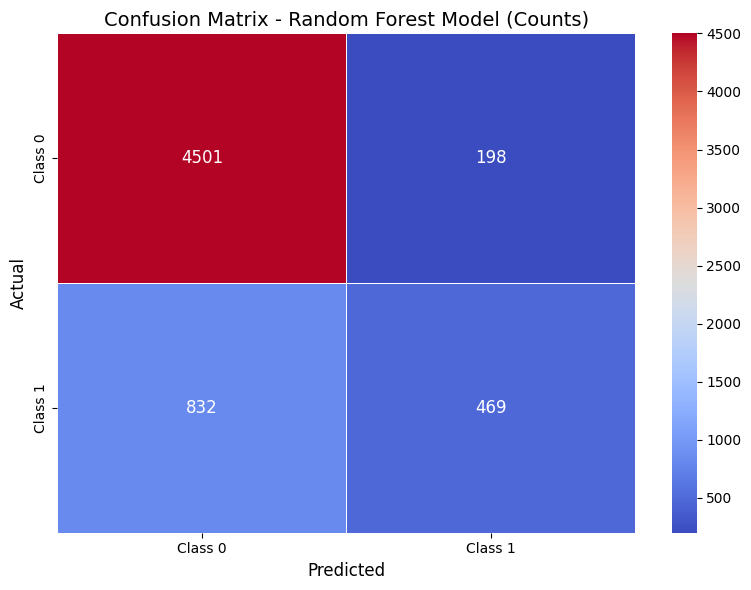

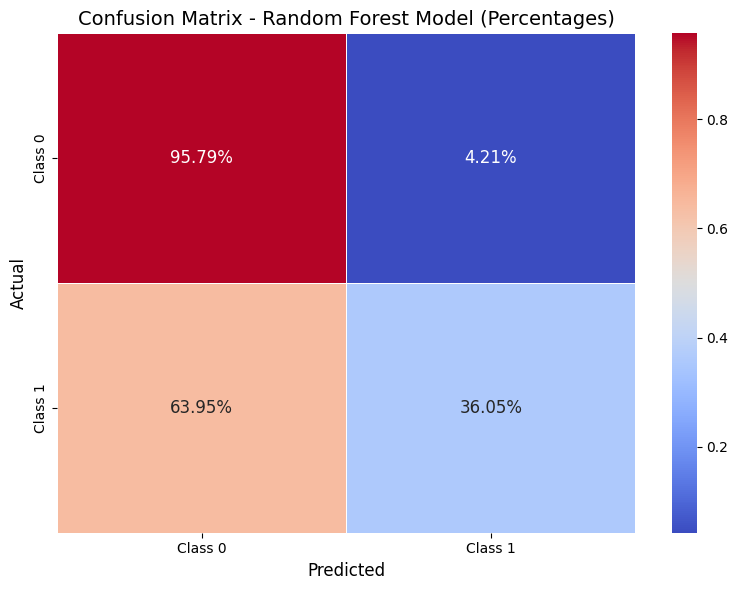

In [183]:
# Confusion matrix (example)
cm = confusion_matrix(y_test, y_pred_rf)

# Percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Improved plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=0.5, annot_kws={"size": 12})
plt.title('Confusion Matrix - Random Forest Model (Counts)', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks([0.5, 1.5], ['Class 0', 'Class 1'], fontsize=10)
plt.yticks([0.5, 1.5], ['Class 0', 'Class 1'], fontsize=10)
plt.tight_layout()
plt.show()

# Plotting percentages separately
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='coolwarm', cbar=True, linewidths=0.5, annot_kws={"size": 12})
plt.title('Confusion Matrix - Random Forest Model (Percentages)', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks([0.5, 1.5], ['Class 0', 'Class 1'], fontsize=10)
plt.yticks([0.5, 1.5], ['Class 0', 'Class 1'], fontsize=10)
plt.tight_layout()
plt.show()


### Feature Engineering


---



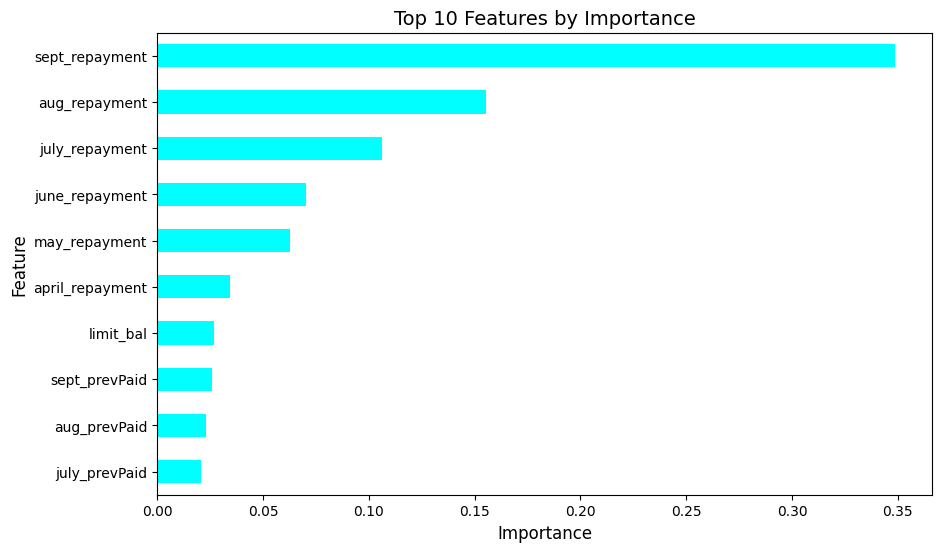

In [194]:
# Feature importance to understand the most significant values for classification:

# Calculate and sort feature importance
importances_top_n = pd.Series(rf.feature_importances_, index=df.drop('default_payment_next_month', axis=1).columns).nlargest(10).sort_values()

# Plot top N features
importances_top_n.plot(kind='barh', color='cyan', figsize=(10, 6))
plt.title(f'Top 10 Features by Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

Let's try subsampling the dataset to see if we can improve the results.

### Random Forest + Undersampling


---



Undersampling: This technique involves reducing the number of samples in the majority class to balance the dataset.
We use it here because our dataset is highly imbalanced, with significantly more instances of "no default payment" (Class 0) than "default payment" (Class 1).
By balancing the dataset, we aim to improve the model's ability to correctly predict the minority class (Class 1), which is critical for this use case.


In [197]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=75)

# Apply undersampling to the training data
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after undersampling:", Counter(y_train_rus))


Class distribution after undersampling: Counter({0: 5335, 1: 5335})


In [198]:
rf_rus = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=75)
rf_rus.fit(X_train_rus, y_train_rus)

y_pred_rf_rus = rf_rus.predict(X_test)

score = accuracy_score(y_test, y_pred_rf_rus)

print("\nModel evaluation:")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score * 100))

print(classification_report(y_test, y_pred_rf_rus))


Model evaluation:
----------------------------
Accuracy on test: 75.80%
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      4699
           1       0.46      0.67      0.55      1301

    accuracy                           0.76      6000
   macro avg       0.68      0.73      0.69      6000
weighted avg       0.80      0.76      0.77      6000



### Random Forest + Oversampling


---



In [205]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=75, sampling_strategy=0.4)
X_train_rfsm, y_train_rfsm = sm.fit_resample(X_train, y_train)

print("Before oversampling:")
print(f"DEFAULT 0: {len(y_train[y_train == 0])}\nDEFAULT 1: {len(y_train[y_train == 1])}")

print("\nAfter oversampling:")
print(f"DEFAULT 0: {len(y_train_rfsm[y_train_rfsm == 0])}\nDEFAULT 1: {len(y_train_rfsm[y_train_rfsm == 1])}")

rf_sm = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=75)
rf_sm.fit(X_train_rfsm, y_train_rfsm)

y_pred_rf_sm = rf_sm.predict(X_test)

score = accuracy_score(y_test, y_pred_rf_sm)

print("\nModel evaluation:")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score * 100))

print(classification_report(y_test, y_pred_rf_sm))


Before oversampling:
DEFAULT 0: 18665
DEFAULT 1: 5335

After oversampling:
DEFAULT 0: 18665
DEFAULT 1: 7466

Model evaluation:
----------------------------
Accuracy on test: 82.90%
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4699
           1       0.67      0.41      0.51      1301

    accuracy                           0.83      6000
   macro avg       0.76      0.68      0.70      6000
weighted avg       0.81      0.83      0.81      6000



### XGBoost


---



In [208]:
from xgboost import XGBClassifier

xgb_original = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=75)
xgb_original.fit(X_train, y_train)

y_pred_xgb = xgb_original.predict(X_test)

score_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nModel evaluation: XGBoost")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score_xgb * 100))
print(classification_report(y_test, y_pred_xgb))



Model evaluation: XGBoost
----------------------------
Accuracy on test: 82.40%
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4699
           1       0.66      0.39      0.49      1301

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.81      0.82      0.81      6000



### Linear Regression


---



In [210]:
from sklearn.linear_model import LogisticRegression

log_reg_original = LogisticRegression(max_iter=1000, random_state=75)
log_reg_original.fit(X_train, y_train)

y_pred_log_reg = log_reg_original.predict(X_test)

score_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("\nModel evaluation: Logistic Regression")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score_log_reg * 100))
print(classification_report(y_test, y_pred_log_reg))



Model evaluation: Logistic Regression
----------------------------
Accuracy on test: 81.52%
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4699
           1       0.71      0.25      0.37      1301

    accuracy                           0.82      6000
   macro avg       0.77      0.61      0.63      6000
weighted avg       0.80      0.82      0.78      6000



### Support Vector Machine


---



In [211]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=1, probability=True, random_state=75)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

score_svc = accuracy_score(y_test, y_pred_svc)
print("\nModel evaluation: Support Vector Machine (SVM)")
print('----------------------------')
print(f'Accuracy on test: %.2f%%' % (score_svc * 100))
print(classification_report(y_test, y_pred_svc))



Model evaluation: Support Vector Machine (SVM)
----------------------------
Accuracy on test: 82.55%
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4699
           1       0.70      0.34      0.46      1301

    accuracy                           0.83      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.81      0.83      0.80      6000

